    Data Set Information:

    A data set describing the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019.
    The data spans a time interval of 4 hours and 25 minutes, in intervals of 5 minutes, concerning the results of the 27 parties involved in the electoral event.
    The data set is tailored for predictive modelling tasks, mostly focused on numerical forecasting tasks.
    Regardless, it allows for other tasks such as ordinal regression or learn-to-rankProvide a short description of your data set (less than 200 characters).

    Additional (and updated) information may be found in [Web Link] :
    - Raw data sets
    - R code to build the final data set
    - Basic operations to build predictive modelling tasks using this data set




    Attribute Information:

    TimeElapsed (Numeric): Time (minutes) passed since the first data acquisition
    time (timestamp): Date and time of the data acquisition
    territoryName (string): Short name of the location (district or nation-wide)
    totalMandates (numeric): MP's elected at the moment
    availableMandates (numeric): MP's left to elect at the moment
    numParishes (numeric): Total number of parishes in this location
    numParishesApproved (numeric): Number of parishes approved in this location
    blankVotes (numeric): Number of blank votes
    blankVotesPercentage (numeric): Percentage of blank votes
    nullVotes (numeric): Number of null votes
    nullVotesPercentage (numeric): Percentage of null votes
    votersPercentage (numeric): Percentage of voters
    subscribedVoters (numeric): Number of subscribed voters in the location
    totalVoters (numeric): Percentage of blank votes
    pre.blankVotes (numeric): Number of blank votes (previous election)
    pre.blankVotesPercentage (numeric): Percentage of blank votes (previous election)
    pre.nullVotes (numeric): Number of null votes (previous election)
    pre.nullVotesPercentage (numeric): Percentage of null votes (previous election)
    pre.votersPercentage (numeric): Percentage of voters (previous election)
    pre.subscribedVoters (numeric): Number of subscribed voters in the location (previous election)
    pre.totalVoters (numeric): Percentage of blank votes (previous election)
    Party (string): Political Party
    Mandates (numeric): MP's elected at the moment for the party in a given district
    Percentage (numeric): Percentage of votes in a party
    validVotesPercentage (numeric): Percentage of valid votes in a party
    Votes (numeric): Percentage of party votes
    Hondt (numeric): Number of MP's according to the distribution of votes now
    FinalMandates (numeric): Target: final number of elected MP's in a district/national-level



In [1]:
#import the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
ElectionData=pd.read_csv('ElectionData.csv')
ElectionData


,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


In [3]:
ElectionData.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

In [4]:
ElectionData.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [6]:
ElectionData

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


In [7]:
ElectionData_By_territoryName=ElectionData.groupby(['territoryName'], as_index=False).sum().sort_values(by=['territoryName'])
ElectionData_By_territoryName

,territoryName,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,Aveiro,143100,8580,8700,158760,116080,7582900,3264.20,4555100,1930.60,...,1808.60,60365.60,466483320,262194300,429,5140.76,5400.58,11897443,864,864
1,Açores,119850,2652,1343,124644,110024,2659684,3879.23,901136,1273.64,...,1356.60,33241.46,151747695,62715788,156,4396.65,4700.18,3066885,235,235
2,Beja,121635,2091,663,68850,61897,1077086,1895.50,868377,1580.32,...,1403.69,53079.95,102188326,59042513,123,5194.74,5398.81,2877763,162,162
3,Braga,150255,13566,7980,393498,324849,12418434,3488.52,7063182,2255.61,...,1467.69,67412.73,680355249,408316587,646,5126.71,5399.80,18123679,1026,1026
4,Bragança,128790,1566,1350,219672,197118,1005444,1970.82,1109502,2199.60,...,1946.88,45486.72,115655616,54370044,87,5168.57,5400.40,2618008,162,162
5,Castelo Branco,128790,2484,1404,116640,109116,1835118,2325.06,1866798,2430.18,...,2099.34,55516.86,149208012,85514346,138,5135.55,5400.06,4047781,216,216
6,Coimbra,143100,5480,4240,167400,138660,5466140,3725.20,3107920,2245.00,...,1905.00,60034.20,309991120,173380980,274,5101.17,5400.52,7557963,486,486
7,Faro,135945,5453,3781,68742,57019,3796960,3016.25,2375646,1886.13,...,1728.62,53696.85,284444535,146421980,287,5142.62,5400.13,6651208,486,486
8,Guarda,135945,2052,1026,248292,234403,1773764,2685.65,1819421,2784.83,...,2437.32,53121.34,145331741,75519870,108,5111.29,5399.47,3353691,162,162
9,Leiria,150255,5964,5376,124740,97314,6588981,4225.41,4183662,2661.12,...,2267.16,63726.81,341858517,191639973,284,5072.39,5400.22,8009322,540,540


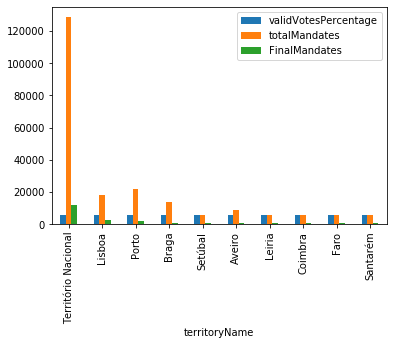

In [8]:
#Top 10 territoryName with FinalMandates descending 

ElectionData_By_territoryName[['validVotesPercentage','totalMandates','FinalMandates','territoryName']].sort_values(by=['FinalMandates'],ascending=False).head(10).plot.bar(x='territoryName')
               



In [9]:
# Lets Check Outliers in the Dataset 
# IQR score technique to remove Outliers 
Q1 = ElectionData_By_territoryName.quantile(0.25)
Q3 = ElectionData_By_territoryName.quantile(0.75)
IQR = Q3 - Q1
print(IQR.shape)
EData = ElectionData_By_territoryName[~((ElectionData_By_territoryName < (Q1-1.5 * IQR)) |(ElectionData_By_territoryName > (Q3 + 1.5 * IQR))).any(axis=1)]
EData.shape


(25,)


(12, 26)

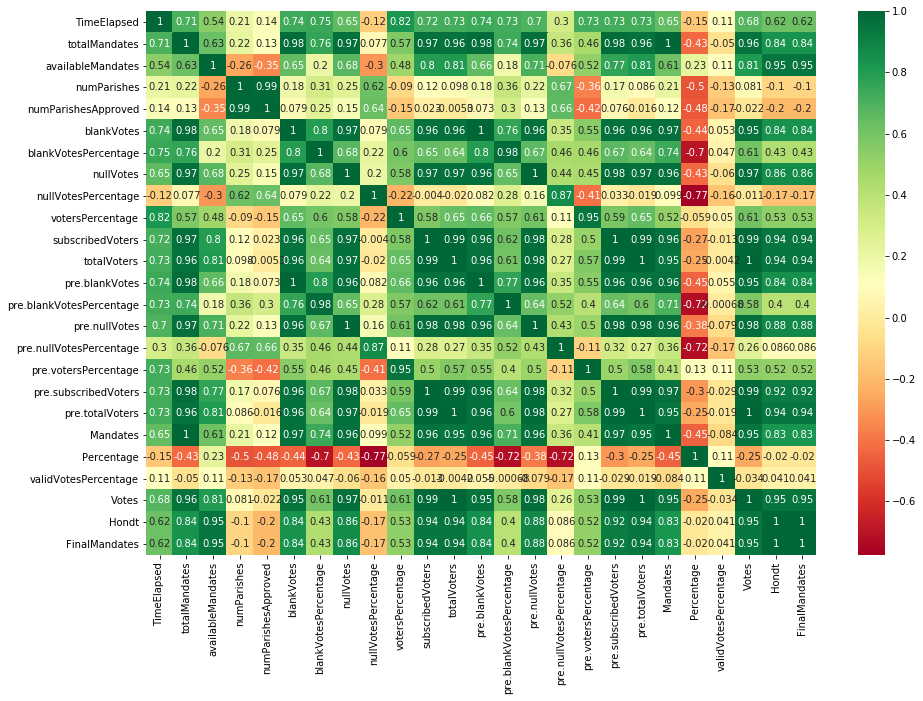

In [10]:
# Correlation of EmpData
plt.figure(figsize=(15,10))
sns.heatmap(data=EData.corr(),annot=True,cmap="RdYlGn")

In [12]:
# Dropping the negative and strongly correlations with FinalMandates
EData.drop(['Hondt','Percentage','numParishes','numParishesApproved'],axis=1,inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
EData['territoryName'] = labelencoder.fit_transform(EData['territoryName'])

In [15]:
x=EData.drop(['FinalMandates'],axis=1)
x.shape

(12, 21)

In [22]:
x.skew()

territoryName               0.000000
TimeElapsed                -1.009002
totalMandates               0.216854
availableMandates           2.054583
blankVotes                  0.486046
blankVotesPercentage        0.291245
nullVotes                   0.248590
nullVotesPercentage        -0.424938
votersPercentage           -1.217687
subscribedVoters            0.281626
totalVoters                 0.451735
pre.blankVotes              0.496231
pre.blankVotesPercentage    0.175860
pre.nullVotes               0.228219
pre.nullVotesPercentage    -0.512876
pre.votersPercentage       -1.090626
pre.subscribedVoters        0.227901
pre.totalVoters             0.385786
Mandates                    0.161269
validVotesPercentage       -0.582594
Votes                       0.439660
dtype: float64

In [16]:
y=EData['FinalMandates']
y=np.array(y).reshape(-1,1)
y.shape

(12, 1)

In [17]:
# splitting data as X_train and X_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

In [18]:
#Linear Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
y_pred = regressor.predict(X_test)

In [20]:
# calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

92.70387269076609

In [21]:
df = pd.DataFrame({'Actual': np.array(y_test)[:,0], 'Predicted': y_pred[:,0]})
df.head(10)

,Actual,Predicted
0,432,410.167442
1,270,189.556765
2,864,1001.237930


In [23]:
# Saving the Model for covid death rate
from sklearn.externals import joblib
joblib.dump(regressor,'Portugal_model.obj')


['Portugal_model.obj']

# Conclusion
    1) One has to predict count of FinalMandates of Portugal .
       .Linear Regression
       .Get tha data group by territoryName
        .Remove the Outliers 
        .Linear Model Prepration 
   